## **지도학습이란**, 답이 있는 것을 학습
### 대표적인 예시: 분류
#### 분류란, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인식한 뒤에 새로운 데이터에 대한 레이블을 판별

#### 본 장에서는 앙상블 -> 배깅(랜덤 포레스트 방법), 부스팅(xgboost, lgbm), 스태킹 배움

## 결정트리
#### 앙상블의 기본 알고리즘
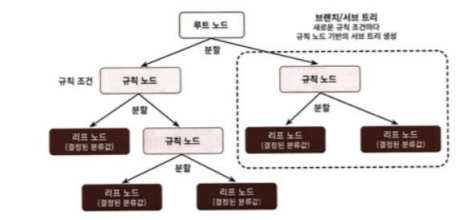

### **특징**
1. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아냄
2. 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
3. 최대한 균일한 데이터 세트를 구성할 수 있도록 분할.
4. 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

### **정보 이득**
#### 엔트로피에 기반 (엔트로피란 주어진 데이터의 혼잡도: 서로 다른 값이 섞여 있으면 엔트로피가 높음)
#### 정보 이득 지수 = 1-엔트로피 지수
#### 지니계수 (0으로 갈수록 데이터 균일도가 높고, 1로 갈수록 낮음) 

### **장점**
#### 쉽다, 직관적이다
#### 피처 스케일링 등 사전 가공 영향도가 크지 않음

### **단점**
#### 과적합, 이를 극보하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요
#### 서브 트리를 만들다보면 피처가 많고, 균일도가 다양하게 존재해져 트리의 깊이가 깊어져 복잡해짐

##Hyperparameter
### 1. min_samples_split
#### 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용
default = 2
작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
### 2. min_samples_leaf
####말단 노드가 되기 위한 최소한의 샘플 데이터 수
min_samples_split과 유사하게 과적합 제어 용도.
imbalanced 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정해야됨
### 3. max_features
####최적의 분할을 위해 고려할 최대 피처 개수.
default = None 모든 피처 사용
int형 : 대상 피처의 개수 / float형 : 대상 피처의 퍼센트
'sqrt', 'auto' 피처개수의 root
'log' : log2개
### 4. max_depth
#### 트리의 최대 깊이
default = None : 완벽하게 클래스 결정 값이 될 때까지 깊이를 키우며 분할 or 노드가 가지는 데이터 개수가 
in_samples_split보다 작아질때까지
깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절하게
### 5. max_leaf_nodes
leaf의 최대개수

## 시각화 예제

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

dt = DecisionTreeClassifier(random_state = 156)
iris_data = load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

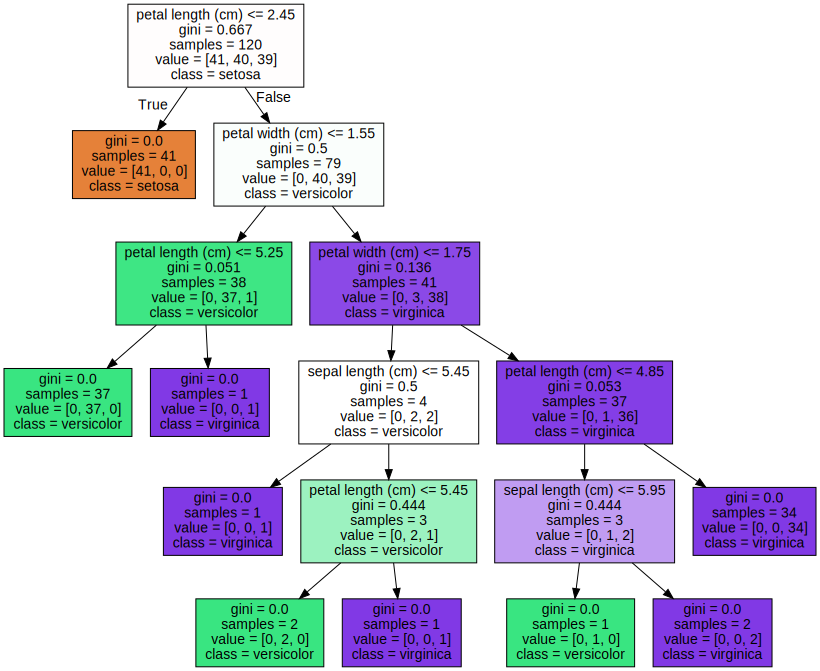

In [ ]:
export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 자식 노드가 없는 노드는 리프 노드
### 리프 노드는 최종 클래스 값이 결정된느 노드
### 리프 노드가 되려면 하나의 클래스 값으로 최종 데이터가 구성 or 리프 노드가 되는 하이퍼파라미터 충족
### **각 노드의 색깔은 데이터의 레이블 값 의미**
### 주황색은 setosa, 초록색은 versicolor, 보라색은 virginica 
### **색깔이 짚을수록 지니계수가 낮고(균일도가 높고), 해당 레이블에 속하는 샘플 데이터가 많다는 듯**

### 1번 노드
#### - samples =120 샘플 120개
#### - value=[41,40,39] -> setosa 41개, versicolor 40개, virginica 39개
#### - 샘플120개가 밸류 분포도로 되어있으므로 지니계수는 0.667 (1-0.333)
#### - petal length <= 2.45 규칙으로 자식 노드 생성
#### - class = setosa는 하위 노드 가질 때 setosa의 개수가 41개로 가장 많다는 의미 (?)

#### 4번 노드를 보면 단 1개의 다른 클래스를 구분하기 위해 자식 노드를 생성함 -> 과적합의 원인 -> **대부분 하이퍼 파라미터는 이러한 복잡한 트리 생성을 방지하기 위한 용도**

#### max_depth = 3 일 때 
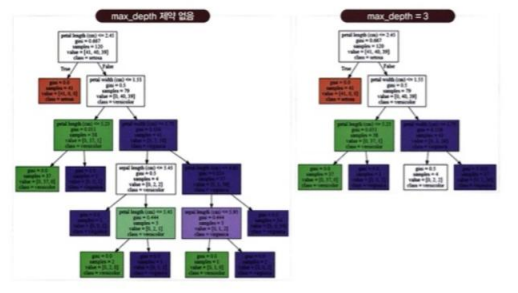

#### min_samples_splits = 4 일 때 
#### 자식 규칙 노드 분할해 만들기 위한 최소한의 샘플 데이터의 수
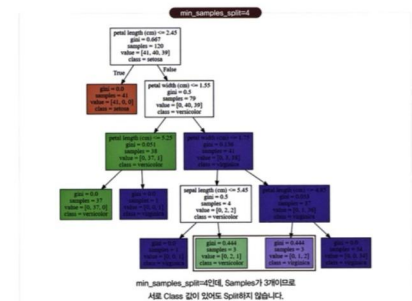

#### min_samples_leaf는 더 이상 자식 노드가 없는 리프 노드는 클래스 결정값이 됨
#### 만약 4이면 샘플이 4이하면 리프 노드가 됨(?)
#### 말단 노드가 되기 위한 최소한의 샘플이 4여야 한다?
#### p-195-196부분 잘 이해안됨

### 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 관건

### 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 feature_importances_속성으로 제공

#### 피처가 트리 분할 시 정보 이득이나 지니 게수를 얼마나 효율적으로 개선시켰는지를 정규화된 값으로 표현한 것

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('Feature Importance : ', np.round(dt.feature_importances_, 3))

Feature Importance :  [0.    0.017 0.057 0.926]


sepal length (cm) : 0.000
sepal width (cm) : 0.017
petal length (cm) : 0.057
petal width (cm) : 0.926


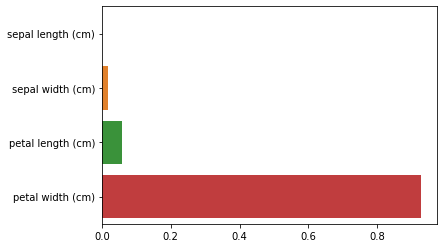

In [ ]:
for name, value in zip(iris_data.feature_names, dt.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(dt.feature_importances_, iris_data.feature_names)

#### 피처 중요도 시각화 결과
#### 알고리즘 내부의 동작 원리가 복잡한 데 반해 결정트리는 알고리즘 자체가 직관적임

### **결정 트리 과적합**

### 분류를 위한 테스트용 데이터를 쉽게 만들 수 있는 함수: make_classification()

In [ ]:
from sklearn.datasets import make_classification #분류를 위한 함수
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


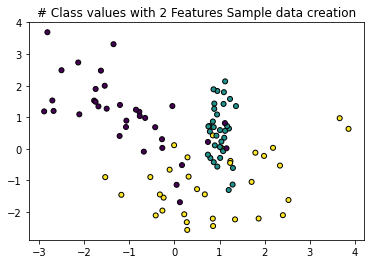

In [ ]:
plt.title('# Class values with 2 Features Sample data creation')

#n_clusters_per_class : The number of clusters per class.
X_features, y_labels = make_classification(n_features = 2, n_redundant=0, n_informative=2,
                                          n_classes = 3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c = y_labels, s = 25, edgecolors='k')


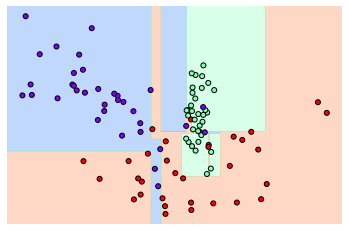

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

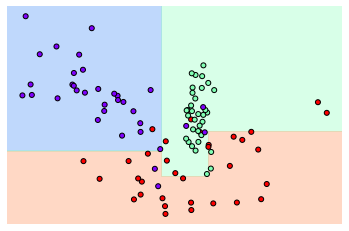

In [ ]:
# min_samples_leaf = 6 일 때
dt = DecisionTreeClassifier(min_samples_leaf=6)
dt.fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

## **결정 트리 실습**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/파머완/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [14]:
# 중복 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


#### 원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.
#### 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [5]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/파머완/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/파머완/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/파머완/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/파머완/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/파머완/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [17]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [18]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


### 1. 디폴트 옵션일 때 정확도

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


### 2. mat_depth값 변화에 따른 정확도

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: ignored

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

### 별도의 데이터 세트에서 정확도 측정(?) (p-207)

In [8]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


### max_depth, min_samples_split 조정 시

In [9]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [10]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


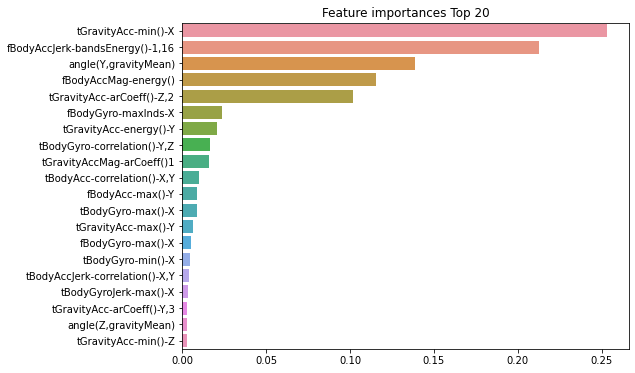

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()